In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Data Points with a Linear Model

This function generates \( n \) points along the x-axis from -10 to 10. The data is modeled using a true underlying linear equation:

y = 3x + 8 + noise

where:
- \( y \) is the dependent variable.
- \( x \) is the independent variable, ranging from -10 to 10.
- **Noise** is added to the model to make the data more realistic, simulating real-world variability.

The noise introduces randomness to the data, which helps in creating a more realistic dataset for testing and modeling purposes.

In [2]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)  # Ensure reproducibility
    X = np.linspace(-10, 10, n)  # Generate `n` evenly spaced values from -10 to 10
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise  # Generate Gaussian noise
    y = true_slope * X + true_intercept + noise  # Linear function with noise
    return X, y

X, y = generate_data(n=50, noise=5.0)


## Hypothesis Function Representation

This function represents the hypothesis function:

h_w(x) = w_0 + w_1 * x

where:
- \( w[0] \) is the intercept (\( w_0 \)).
- \( w[1] \) is the slope (\( w_1 \)).

The hypothesis function \( h_w(x) \) is used to model the relationship between the independent variable \( x \) and the dependent variable, with \( w_0 \) and \( w_1 \) representing the model parameters.

In [3]:
def h_w(x, w):
    return w[0] + w[1] * x

## Computing Optimal Parameters Using the Normal Equation

This function computes the optimal parameters using the Normal Equation:

w = (X^T X)^(-1) X^T y

### Explanation:

- **Adding a Bias Term:**
  - `X_b = np.c_[np.ones((len(X), 1)), X]`: Adds a bias term (a column of ones) to X to represent x_0 = 1.

- **Computing the Closed-Form Solution:**
  - `X_b.T.dot(X_b)`: Computes X^T X.
  - `np.linalg.inv(...)`: Computes the inverse (X^T X)^(-1).
  - `.dot(X_b.T).dot(y)`: Multiplies by X^T y to get the weights w.

The Normal Equation provides a closed-form solution for linear regression, allowing you to compute the optimal weights w directly using matrix operations.

In [4]:
def linear_regression_closed_form(X, y):
    X_b = np.c_[np.ones((len(X), 1)), X]  # Add bias term (x_0 = 1)
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Closed-form solution
    return w


## Finding Optimal Weights and Predicting Values

### Finding Optimal Weights

The optimal weights are found using the Normal Equation:

w = (X^T X)^(-1) X^T y

This equation provides a closed-form solution for linear regression, allowing you to compute the optimal weights w directly using matrix operations.

### Predicting Values

Once the optimal weights are determined, the predicted values y_pred can be calculated using the hypothesis function:

h_w(x) = w_0 + w_1 * x

where h_w(x, w) represents the predicted value for a given input x using the weights w.

In [5]:
w = linear_regression_closed_form(X, y)
y_pred = h_w(X, w)  # Predictions using trained weights

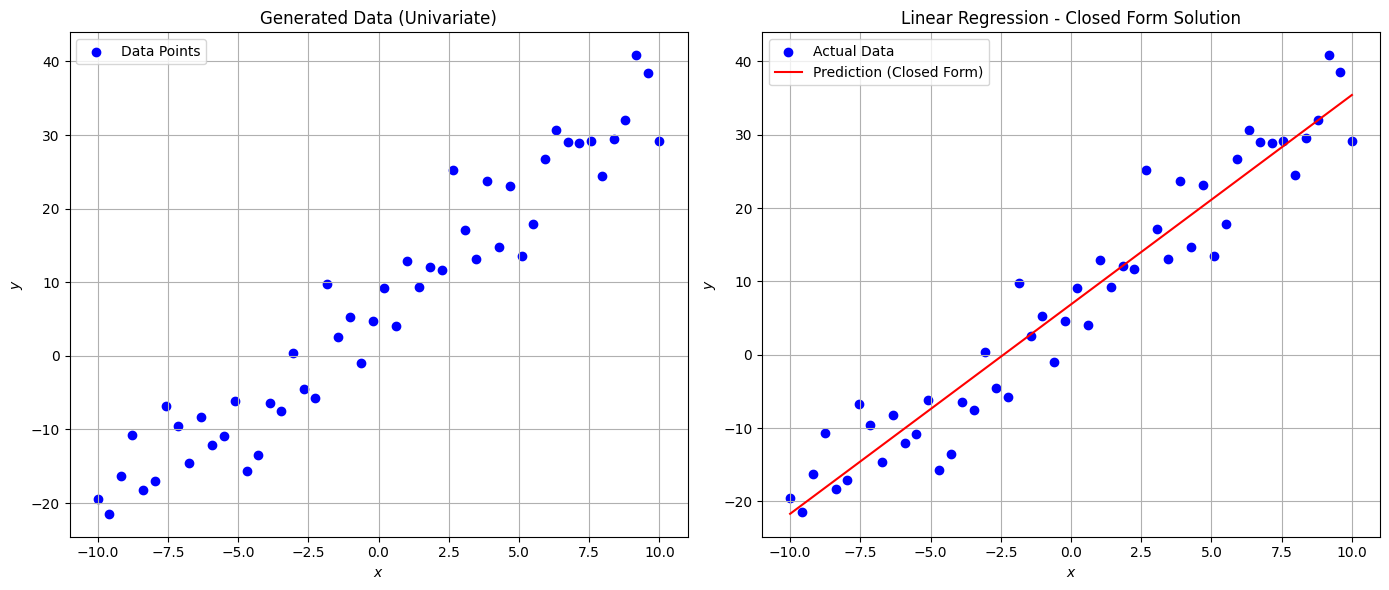

Parameters (w): 
w_1 = 2.86, w_0 = 6.87


In [6]:
# Create a single figure with two side-by-side subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axs[0].scatter(X, y, color='blue', label='Data Points')
axs[0].set_title("Generated Data (Univariate)")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$y$")
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(X, y, color='blue', label='Actual Data')
axs[1].plot(X, y_pred, color='red', label='Prediction (Closed Form)')
axs[1].set_title("Linear Regression - Closed Form Solution")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$y$")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")